# 기본 환경 구축

MMDetection사용 위해 pytorch 및 cuda 설치

In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 866.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.0+

MMDetection을 만든 OpenMMLab에서 라이브러리 관리해주는 라이브러리 설치

In [ ]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0


In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36456, done.
remote: Counting objects: 100% (1110/1110), done.
remote: Compressing objects: 100% (656/656), done.
remote: Total 36456 (delta 580), reused 788 (delta 440), pack-reused 35346
Receiving objects: 100% (36456/36456), 56.87 MiB | 3.48 MiB/s, done.
Resolving deltas: 100% (25518/25518), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


설치 확인

In [ ]:
import mmdet
print(mmdet.__version__)

2.28.2


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


# Dataset Download from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir MyDataset
!unzip -q  /content/drive/MyDrive/MyDataset.zip -d /content/mmdetection/MyDataset

# Train A Detector on A Customized Dataset

In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class MyDataset(CocoDataset):
    CLASSES = ("해태포키블루베리41G", "꼬깔콘고소한맛72G", "농심오징어집83G", "농심매운새우깡90G",
               "크라운)콘초66G", "농심바나나킥75G", "롯데)자일리톨베타비타D용기86G")

#### cfg 수정

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-608_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 32

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'MyDataset'
cfg.data_root = './'

cfg.data.test.type = 'MyDataset'
cfg.data.test.data_root = './MyDataset/'
cfg.data.test.ann_file = 'annotations.json'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'MyDataset'
cfg.data.train.data_root = './MyDataset/'
cfg.data.train.ann_file = 'annotations.json'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'MyDataset'
cfg.data.val.data_root = './MyDataset/'
cfg.data.val.ann_file = 'annotations.json'
cfg.data.val.img_prefix = 'images'

cfg.model.bbox_head.num_classes = 7

cfg.load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'

# Set up working dir to save files and logs.
cfg.work_dir = ''

cfg.optimizer.lr = 0.001 / 8
cfg.optimizer.momentum = 0.95
cfg.log_config.interval = 10

cfg.runner.max_epochs = 20

cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 2

cfg.evaluation.metric = ['bbox']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=5)
log_config = dict(
    interval=10,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=7,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
 

In [ ]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
train_dataset


MyDataset Train dataset with number of images 798, and instance counts: 
+-------------------------+-------+-----------------------------------+-------+---------------------+-------+-----------------------+-------+--------------------+-------+
| category                | count | category                          | count | category            | count | category              | count | category           | count |
+-------------------------+-------+-----------------------------------+-------+---------------------+-------+-----------------------+-------+--------------------+-------+
| 0 [해태포키블루베리41G] | 201   | 1 [꼬깔콘고소한맛72G]             | 206   | 2 [농심오징어집83G] | 199   | 3 [농심매운새우깡90G] | 201   | 4 [크라운)콘초66G] | 211   |
|                         |       |                                   |       |                     |       |                       |       |                    |       |
| 5 [농심바나나킥75G]     | 197   | 6 [롯데)자일리톨베타비타D용기86G] | 205   |                     |       |             

In [ ]:
test_dataset


MyDataset Train dataset with number of images 798, and instance counts: 
+-------------------------+-------+-----------------------------------+-------+---------------------+-------+-----------------------+-------+--------------------+-------+
| category                | count | category                          | count | category            | count | category              | count | category           | count |
+-------------------------+-------+-----------------------------------+-------+---------------------+-------+-----------------------+-------+--------------------+-------+
| 0 [해태포키블루베리41G] | 201   | 1 [꼬깔콘고소한맛72G]             | 206   | 2 [농심오징어집83G] | 199   | 3 [농심매운새우깡90G] | 201   | 4 [크라운)콘초66G] | 211   |
|                         |       |                                   |       |                     |       |                       |       |                    |       |
| 5 [농심바나나킥75G]     | 197   | 6 [롯데)자일리톨베타비타D용기86G] | 205   |                     |       |             

### Pre Trained 모델 다운로드

In [ ]:
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth \
      -O checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth

--2023-06-19 00:54:32--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.218, 163.181.82.217, 163.181.82.215, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248093138 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  39.5MB/s    in 6.1s    

2023-06-19 00:54:38 (39.1 MB/s) - ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’ saved [248093138/248093138]



#### cfg 수정버전으로 모델 적용

In [ ]:
from mmdet.models import build_detector

model = build_detector(cfg.model)

model.CLASSES = train_dataset.CLASSES

### 모델 학습 수행

In [ ]:
import os.path as osp
import mmcv
from mmdet.apis import train_detector

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True)

2023-06-19 00:54:58,989 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-06-19 00:54:59,006 - mmdet - INFO - load checkpoint from local path: checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2023-06-19 00:54:59,253 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.convs_pred.0.weight: copying a param with shape torch.Size([255, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([36, 1024, 1, 1]).
size mismatch for bbox_head.convs_pred.0.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([36]).
size mismatch for bbox_head.convs_pred.1.weight: copying a param with shape torch.Size([255, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([36, 512, 1, 1]).
size mismatch for bbox_head.convs_pred.1.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([36]).
size mismatch for bbox_head.convs_pred.2.weight: copying a param with shape torch.Size([255, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([36, 256, 1, 1]).
size mismatch for bbox_head.convs_pred.2.bi

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 798/798, 7.0 task/s, elapsed: 114s, ETA:     0s

2023-06-19 01:16:25,512 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.18s).
Accumulating evaluation results...


2023-06-19 01:16:28,497 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.194
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.224
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.577
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.577
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.577
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.68s).


2023-06-19 01:16:40,819 - mmdet - INFO - Epoch [6][10/200]	lr: 6.926e-05, eta: 0:58:07, time: 1.225, data_time: 0.778, memory: 3835, loss_cls: 16.1789, loss_conf: 10.2915, loss_xy: 16.8180, loss_wh: 0.6784, loss: 43.9668, grad_norm: 376.8078
2023-06-19 01:16:52,408 - mmdet - INFO - Epoch [6][20/200]	lr: 6.982e-05, eta: 0:57:55, time: 1.158, data_time: 0.732, memory: 3835, loss_cls: 16.3003, loss_conf: 10.7012, loss_xy: 15.9883, loss_wh: 3.0814, loss: 46.0711, grad_norm: 367.4020
2023-06-19 01:17:03,461 - mmdet - INFO - Epoch [6][30/200]	lr: 7.038e-05, eta: 0:57:42, time: 1.106, data_time: 0.672, memory: 3835, loss_cls: 15.4053, loss_conf: 7.6226, loss_xy: 15.1179, loss_wh: 0.4250, loss: 38.5708, grad_norm: 319.6573
2023-06-19 01:17:14,800 - mmdet - INFO - Epoch [6][40/200]	lr: 7.094e-05, eta: 0:57:29, time: 1.134, data_time: 0.691, memory: 3835, loss_cls: 17.9639, loss_conf: 11.9112, loss_xy: 18.8837, loss_wh: 1.3486, loss: 50.1075, grad_norm: 473.8992
2023-06-19 01:17:27,910 - mmdet -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 798/798, 7.0 task/s, elapsed: 115s, ETA:     0s

2023-06-19 01:38:07,777 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.54s).
Accumulating evaluation results...


2023-06-19 01:38:09,932 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.819
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.365
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.54s).


2023-06-19 01:38:21,936 - mmdet - INFO - Epoch [11][10/200]	lr: 1.250e-04, eta: 0:38:55, time: 1.194, data_time: 0.771, memory: 3835, loss_cls: 9.6959, loss_conf: 4.6567, loss_xy: 14.9662, loss_wh: 1.0550, loss: 30.3738, grad_norm: 326.2754
2023-06-19 01:38:34,630 - mmdet - INFO - Epoch [11][20/200]	lr: 1.250e-04, eta: 0:38:44, time: 1.270, data_time: 0.828, memory: 3835, loss_cls: 10.5187, loss_conf: 10.0587, loss_xy: 18.0632, loss_wh: 1.1603, loss: 39.8008, grad_norm: 429.9132
2023-06-19 01:38:45,087 - mmdet - INFO - Epoch [11][30/200]	lr: 1.250e-04, eta: 0:38:31, time: 1.046, data_time: 0.602, memory: 3835, loss_cls: 11.0356, loss_conf: 6.1852, loss_xy: 16.8282, loss_wh: 0.8276, loss: 34.8766, grad_norm: 355.7905
2023-06-19 01:38:55,992 - mmdet - INFO - Epoch [11][40/200]	lr: 1.250e-04, eta: 0:38:19, time: 1.090, data_time: 0.663, memory: 3835, loss_cls: 9.7367, loss_conf: 5.9386, loss_xy: 16.7983, loss_wh: 1.0671, loss: 33.5408, grad_norm: 383.5523
2023-06-19 01:39:09,106 - mmdet -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 798/798, 7.1 task/s, elapsed: 113s, ETA:     0s

2023-06-19 01:59:41,947 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.05s).
Accumulating evaluation results...


2023-06-19 01:59:43,256 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.972
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.620
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.620
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.620
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.23s).


2023-06-19 01:59:58,008 - mmdet - INFO - Epoch [16][10/200]	lr: 1.250e-04, eta: 0:19:23, time: 1.472, data_time: 1.037, memory: 3835, loss_cls: 4.9342, loss_conf: 7.1134, loss_xy: 19.2547, loss_wh: 1.4720, loss: 32.7742, grad_norm: 332.7460
2023-06-19 02:00:13,243 - mmdet - INFO - Epoch [16][20/200]	lr: 1.250e-04, eta: 0:19:13, time: 1.523, data_time: 1.087, memory: 3835, loss_cls: 2.3872, loss_conf: 4.2703, loss_xy: 15.3093, loss_wh: 0.9577, loss: 22.9245, grad_norm: 269.1259
2023-06-19 02:00:22,614 - mmdet - INFO - Epoch [16][30/200]	lr: 1.250e-04, eta: 0:19:00, time: 0.937, data_time: 0.510, memory: 3835, loss_cls: 3.1568, loss_conf: 6.0766, loss_xy: 15.3833, loss_wh: 1.4911, loss: 26.1078, grad_norm: 341.3974
2023-06-19 02:00:34,912 - mmdet - INFO - Epoch [16][40/200]	lr: 1.250e-04, eta: 0:18:49, time: 1.230, data_time: 0.754, memory: 3835, loss_cls: 2.9875, loss_conf: 5.3860, loss_xy: 16.6398, loss_wh: 1.9252, loss: 26.9385, grad_norm: 385.3849
2023-06-19 02:00:46,075 - mmdet - IN

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 798/798, 7.1 task/s, elapsed: 113s, ETA:     0s

2023-06-19 02:21:36,454 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.08s).
Accumulating evaluation results...


2023-06-19 02:21:37,944 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.390
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.910
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.36s).


### 학습 모델로 결과 예측

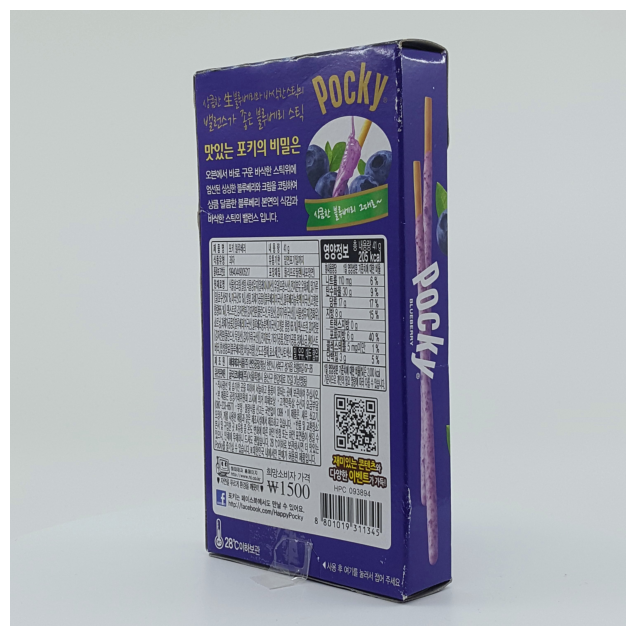

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/mmdetection/MyDataset/images/10060_0_s_16.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot

checkpoint_file = './epoch_15.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('/content/mmdetection/MyDataset/images/10060_0_m_11.jpg') # BGR Image 사용

result = inference_detector(model_ckpt, img)

show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
result

[array([[1.7730005e+03, 7.2214856e+02, 2.4879990e+03, 2.0480327e+03,
         9.6820319e-01],
        [1.0990441e+03, 6.3048132e+02, 1.9031619e+03, 2.2627146e+03,
         9.2922050e-01],
        [1.7956078e+02, 5.9256079e+02, 1.2158253e+03, 2.4250676e+03,
         9.2304283e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[1.7640712e+03, 7.4464093e+02, 2.4878945e+03, 2.1159368e+03,
         8.1411965e-02],
        [1.9334512e+02, 7.3392413e+02, 1.2141992e+03, 2.4268953e+03,
         1.3199146e-02],
        [1.0469850e+03, 5.4465784e+02, 1.9299147e+03, 2.3817102e+03,
         1.7194591e-03]], dtype=float32),
 array([[2.0407286e+02, 2.8793494e+02, 1.2197201e+03, 2.5290562e+03,
         7.7469490e-04],
        [1.0469850e+03, 5.4465784e+02, 1.9299147e+03, 2.3817102e+03,
         7.3386432e-04]], dtype=float32),
 array([[2.0407286e+02, 2.8793494e+02, 1.2197201e+03, 2.5290562e+03,
         6.8949326e-04]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 arr

In [ ]:
score_thr = 0.5

for idx in range(len(result)):
    if result[idx].any(): # 감지된 객체가 아무거나 있다면
        for cnt in range(len(result[idx])):
            if result[idx][cnt][-1] > score_thr:
                print(result[idx][cnt], model.CLASSES[idx])
            # print(cnt)
        # print(result[idx])

[1.7730005e+03 7.2214856e+02 2.4879990e+03 2.0480327e+03 9.6820319e-01] 해태포키블루베리41G
[1.0990441e+03 6.3048132e+02 1.9031619e+03 2.2627146e+03 9.2922050e-01] 해태포키블루베리41G
[1.7956078e+02 5.9256079e+02 1.2158253e+03 2.4250676e+03 9.2304283e-01] 해태포키블루베리41G


In [ ]:
model.CLASSES

('해태포키블루베리41G',
 '꼬깔콘고소한맛72G',
 '농심오징어집83G',
 '농심매운새우깡90G',
 '크라운)콘초66G',
 '농심바나나킥75G',
 '롯데)자일리톨베타비타D용기86G')

### 모델 평가

In [ ]:
from mmdet.datasets import build_dataloader, build_dataset

# test용 Dataset과 DataLoader 생성.
data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

In [ ]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 결과 이미지가 저장됨.
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

In [ ]:
metric = test_dataset.evaluate(results, metric=['bbox'])
print(metric)